In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/cars-image-dataset
/kaggle/input/cars-image-dataset/Cars Dataset
/kaggle/input/cars-image-dataset/Cars Dataset/test
/kaggle/input/cars-image-dataset/Cars Dataset/test/Hyundai Creta
/kaggle/input/cars-image-dataset/Cars Dataset/test/Tata Safari
/kaggle/input/cars-image-dataset/Cars Dataset/test/Swift
/kaggle/input/cars-image-dataset/Cars Dataset/test/Mahindra Scorpio
/kaggle/input/cars-image-dataset/Cars Dataset/test/Toyota Innova
/kaggle/input/cars-image-dataset/Cars Dataset/test/Rolls Royce
/kaggle/input/cars-image-dataset/Cars Dataset/test/Audi
/kaggle/input/cars-image-dataset/Cars Dataset/train
/kaggle/input/cars-image-dataset/Cars Dataset/train/Hyundai Creta
/kaggle/input/cars-image-dataset/Cars Dataset/train/Tata Safari
/kaggle/input/cars-image-dataset/Cars Dataset/train/Swift
/kaggle/input/cars-image-dataset/Cars Dataset/train/Mahindra Scorpio
/kaggle/input/cars-image-dataset/Cars Dataset/train/Toyota Innova
/kaggle/input/cars-image-dataset/Cars Datase

## Importing the required libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

## Importing data into tensorflow dataset object

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/cars-image-dataset/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [4]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.9237241  0.91980255 0.90098435]
  [0.90874106 0.9048195  0.88640624]
  [0.89375806 0.8898365  0.8718282 ]
  ...
  [0.66664505 0.7882137  0.9607627 ]
  [0.6627451  0.7843138  0.9568628 ]
  [0.6627451  0.7843138  0.9568628 ]]

 [[0.38985875 0.38904813 0.36010745]
  [0.4631541  0.46193856 0.43421268]
  [0.53644943 0.53482896 0.50831795]
  ...
  [0.66624004 0.7878087  0.9603577 ]
  [0.6627451  0.7843138  0.9568628 ]
  [0.66351455 0.78354436 0.9564781 ]]

 [[0.5212363  0.5212363  0.48368376]
  [0.48479107 0.48479107 0.44804844]
  [0.44834587 0.44834587 0.41241315]
  ...
  [0.66583514 0.78740376 0.9599528 ]
  [0.6627451  0.7843138  0.9568628 ]
  [0.66432446 0.78273445 0.95607316]]

 ...

 [[0.8346556  0.80328304 0.72877324]
  [0.8313726  0.8000001  0.7254902 ]
  [0.81794363 0.786571   0.7120612 ]
  ...
  [0.79520494 0.7599108  0.69324416]
  [0.79560995 0.76031584 0.6936492 ]
  [0.79601485 0.76072073 0.69405407]]

 [[0.8338457  0.8024731  0.7279633 ]
  [0.8313726  0.8000001  0.7254902 ]


In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [6]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/kaggle/input/cars-image-dataset/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [7]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.1540976  0.1448976  0.1781307 ]
  [0.15014027 0.16358572 0.21064454]
  [0.13875535 0.14442968 0.1871509 ]
  ...
  [0.34941348 0.3847076  0.40431544]
  [0.33827865 0.37357277 0.3931806 ]
  [0.3271438  0.3624379  0.38204575]]

 [[0.15356737 0.1395953  0.17017725]
  [0.15332165 0.16782756 0.21488638]
  [0.1361042  0.142839   0.18768112]
  ...
  [0.27428356 0.3095777  0.32944947]
  [0.28913    0.32442415 0.34535637]
  [0.30397645 0.3392706  0.3612633 ]]

 [[0.15303715 0.13429299 0.1622238 ]
  [0.15650304 0.1720694  0.21912822]
  [0.13345304 0.1412483  0.18821137]
  ...
  [0.38096797 0.41645402 0.44342515]
  [0.38414934 0.42069584 0.44501588]
  [0.38733074 0.4249377  0.44660655]]

 ...

 [[0.59600663 0.5763988  0.5528694 ]
  [0.593547   0.57393914 0.55040973]
  [0.5908959  0.571288   0.5477586 ]
  ...
  [0.7058824  0.6862745  0.6627451 ]
  [0.7086679  0.68906003 0.6655306 ]
  [0.7185396  0.69893175 0.67540234]]

 [[0.5767704  0.5571626  0.5336332 ]
  [0.57505983 0.555452   0.5319226 ]


## Creating the CNN model

In [8]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

2022-12-02 10:32:05.602127: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                2764896   
_________________________________________________________________
dropout (Dropout)            (None, 96)                0

## Compiling the model

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

2022-12-02 10:32:06.083728: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
105/105 [==============================] - 55s 512ms/step - loss: 1.8243 - accuracy: 0.2924 - val_loss: 1.7210 - val_accuracy: 0.3481
Epoch 2/50
105/105 [==============================] - 40s 379ms/step - loss: 1.7057 - accuracy: 0.3598 - val_loss: 1.5381 - val_accuracy: 0.4539
Epoch 3/50
105/105 [==============================] - 39s 373ms/step - loss: 1.5943 - accuracy: 0.4111 - val_loss: 1.5181 - val_accuracy: 0.4563
Epoch 4/50
105/105 [==============================] - 40s 379ms/step - loss: 1.4713 - accuracy: 0.4639 - val_loss: 1.3742 - val_accuracy: 0.5092
Epoch 5/50
105/105 [==============================] - 39s 375ms/step - loss: 1.4105 - accuracy: 0.4887 - val_loss: 1.3521 - val_accuracy: 0.5080
Epoch 6/50
105/105 [==============================] - 39s 371ms/step - loss: 1.3396 - accuracy: 0.5155 - val_loss: 1.2424 - val_accuracy: 0.5547
Epoch 7/50
105/105 [==============================] - 41s 387ms/step - loss: 1.2773 - accuracy: 0.5430 - val_loss: 1.1768 - val_ac

In [12]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 6s 215ms/step - loss: 1.0565 - accuracy: 0.7196


In [13]:
scores

[1.05652916431427, 0.7195571660995483]

## Plotting the accuracy and loss curves

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
type(history.history['loss'])

list

In [16]:
len(history.history['loss'])

50

In [17]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.8242543935775757,
 1.7056877613067627,
 1.594315767288208,
 1.471322774887085,
 1.4104963541030884]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

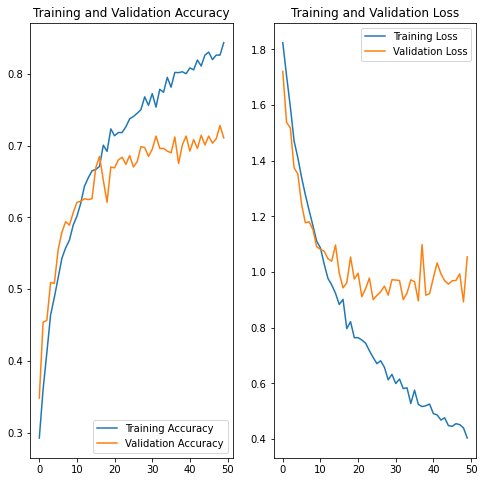

In [20]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing the prediction on sample of image from test dataset

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

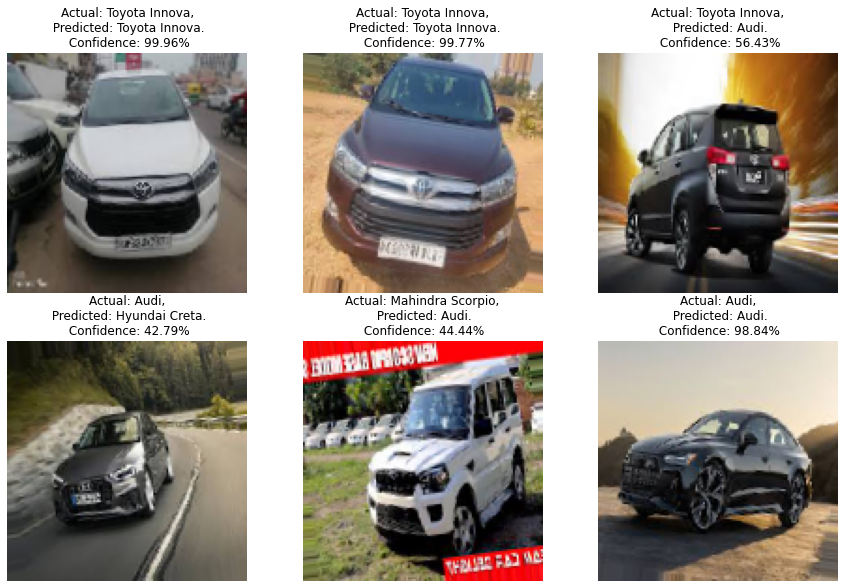

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [23]:
from keras.models import load_model

model.save('my_model.hdf5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.hdf5')

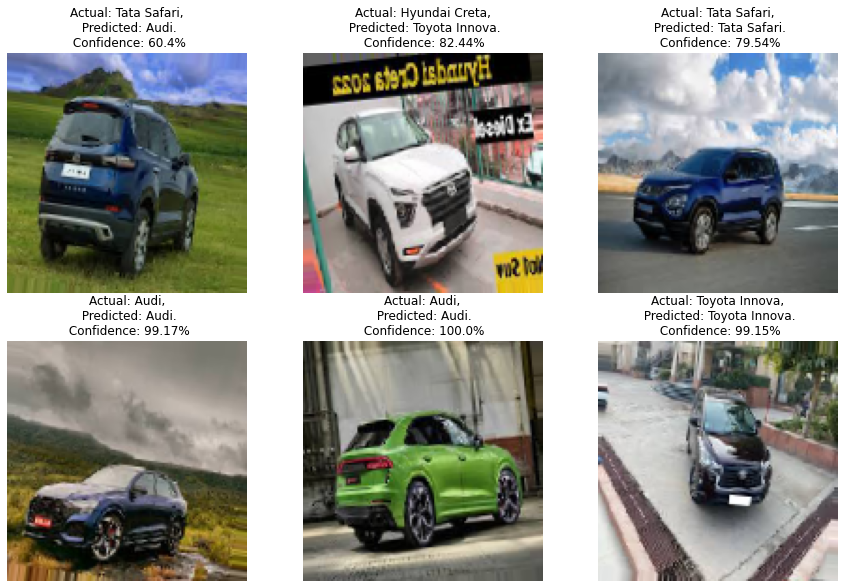

In [24]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break